In [1]:
import pandas as pd
import numpy as np

import sklearn 

from numpy import mean
from numpy import std

from sklearn.preprocessing import StandardScaler

from sklearn import linear_model

#from sklearn.linear_model import Ridge
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import ElasticNet

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import make_scorer

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Basic Dummified Dataset for Linear Models
base = pd.read_csv('../../Data/BaseData.csv')
base.shape

(2580, 299)

In [3]:
X = base['GrLivArea'].values.reshape(-1,1)
y = base.SalePrice.values.reshape(-1,1)

#scaler = StandardScaler()
#X = scaler.fit_transform(X)
#y=np.log10(y)

In [4]:
simple = linear_model.LinearRegression()

In [5]:
scoring = {'r2': 'r2',
           'neg_mae': 'neg_mean_absolute_error'}

In [6]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [21]:
SLR = evaluate_model(simple, X,y)
SLR

,fit_time,score_time,test_r2,test_neg_mae
0,0.002175,0.001160,0.492545,-37786.183210
1,0.002168,0.001093,0.500684,-35402.946111
2,0.002129,0.001100,0.530382,-34970.842292
3,0.002126,0.000792,0.553000,-34575.192950
4,0.001913,0.000956,0.509211,-36853.942966
5,0.001571,0.000648,0.503816,-37314.133001
6,0.001231,0.000564,0.569944,-32490.216141
7,0.001472,0.000637,0.515928,-35952.665336
8,0.001435,0.000611,0.493042,-35693.252076
9,0.001350,0.000605,0.505414,-38245.540747


In [22]:
#SLR = SLR[0][['test_r2', 'test_neg_mae']]
SLR = SLR.assign(MAE = SLR['test_neg_mae'].abs())
SLR = SLR.rename(columns = {'test_r2':'SLR R2 Area', 'MAE':'SLR MAE Area'})
SLR

,fit_time,score_time,SLR R2 Area,test_neg_mae,SLR MAE Area
0,0.002175,0.001160,0.492545,-37786.183210,37786.183210
1,0.002168,0.001093,0.500684,-35402.946111,35402.946111
2,0.002129,0.001100,0.530382,-34970.842292,34970.842292
3,0.002126,0.000792,0.553000,-34575.192950,34575.192950
4,0.001913,0.000956,0.509211,-36853.942966,36853.942966
5,0.001571,0.000648,0.503816,-37314.133001,37314.133001
6,0.001231,0.000564,0.569944,-32490.216141,32490.216141
7,0.001472,0.000637,0.515928,-35952.665336,35952.665336
8,0.001435,0.000611,0.493042,-35693.252076,35693.252076
9,0.001350,0.000605,0.505414,-38245.540747,38245.540747


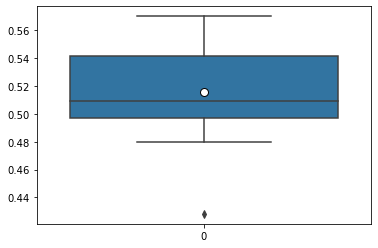

In [23]:
sns.boxplot(data=SLR['SLR R2 Area'], showmeans=True,
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"});

In [24]:
SLR.describe()

,fit_time,score_time,SLR R2 Area,test_neg_mae,SLR MAE Area
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.001592,0.000723,0.515395,-35944.084554,35944.084554
std,0.000395,0.000236,0.037207,1893.932561,1893.932561
min,0.001140,0.000483,0.428189,-40247.172803,32490.216141
25%,0.001271,0.000564,0.496863,-37084.037984,34791.721247
50%,0.001462,0.000611,0.509211,-35402.946111,35402.946111
75%,0.002020,0.000874,0.541691,-34791.721247,37084.037984
max,0.002175,0.001160,0.569944,-32490.216141,40247.172803


In [25]:
SLR.to_csv('SLR_Area.csv', index=False)

In [ ]:
#sklearn.metrics.SCORERS.keys()

In [ ]:
X = base['GrLivArea'].values.reshape(-1,1)
y = base.SalePrice.values.reshape(-1,1)


In [ ]:
simple.fit(X,y)
response = simple.predict(X)
r2 = simple.score(X,y)

In [ ]:
response

In [ ]:
r2

In [ ]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='blue', label='R-Squared of 0.52')
ax.scatter(X, y, edgecolor='k', facecolor='white', alpha=0.8, label='Data')
ax.set_ylabel('House Sale Price (US$)', fontsize=14)
ax.set_xlabel('Ground Living Area', fontsize=14)
#ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('Simple Linear Regression (Area vs Price)', fontsize = 18, color='blue')
#ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

In [ ]:
x = base[["GrLivArea"]]
y = base.SalePrice

In [ ]:
x_constant = sm.add_constant(x)

In [ ]:
#Run OLS with statsmodels
lin_reg = sm.OLS(y,x_constant).fit()
lin_reg.summary()

In [ ]:
from scipy import stats
import statsmodels.api as sm

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s', fmt='k', markeredgecolor='k', markerfacecolor='white', markersize=2, alpha=0.8);
    plt.title('Q-Q plot, Simple Linear Regression (Area vs Price)');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
#normality_of_residuals_test(lin_reg)

In [ ]:
normality_of_residuals_test(lin_reg)

In [ ]:
simple.fit(X,np.log10(y))
response = simple.predict(X)
r2 = simple.score(X,np.log10(y))

In [ ]:
response

In [ ]:
r2

In [ ]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='R-Squared of 0.52')
ax.scatter(X, np.log10(y), edgecolor='k', facecolor='white', alpha=0.8, label='Data')
ax.set_ylabel('House Sale Price (Log Base 10)', fontsize=14)
ax.set_xlabel('Ground Living Area', fontsize=14)
#ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('Simple Linear Regression', fontsize = 18)
#ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()